<img src="https://drive.google.com/uc?id=1qneK9cW2DLMdmAP-HEIncIYuqHw0mI0_" />


[alt text]('https://drive.google.com/file/d/1qneK9cW2DLMdmAP-HEIncIYuqHw0mI0_/view?usp=sharing')

<p style="font-size: 16px">In this Session, you will practice training a model by using Stochastic Gradient descent.</p>

### Contents
<ul>
    <li><a href='#1'>Libraries & Contants</a></li>
    <li><a href='#2'>In a <b>nutshell</b>:</a></li>
    <ul>
        <li><a href='#21'>What is a tensor?</a></li>
        <li><a href='#22'>Derivative in PyTorch</a></li>
        <li><a href='#23'>Partial Derivative in PyTorch</a></li>
        <li><a href='#24'>Set the random seed number</a></li>
    </ul>
    <li><a href='#3'>Implement some handy functions</a></li>
    <li><a href='#4'>Make a regression problem and it's data</a></li>
    <li><a href='#5'>Train the model using Batch Gradient Descent</a></li>
    <li><a href='#6'>Train the model using Stochastic Gradient Descent</a></li>
    <li><a href='#7'>Compare SGD and BGD loss</a></li>
    
</ul>
<hr>


<h2><div id='1'>Libraries & Contants</div></h2>
<br>
In this part, we import the libraries which we need in this section.


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

<h2><div id='2'>In a nutshell:</div></h2>

<h3><div id='21'>What is a tensor?</div></h3>
<br />
A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

In [ ]:
torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

tensor([[1, 2, 3],
        [4, 5, 6]])

<h3><div id='22'>Derivative in Pytorch</div></h3>
<br/>
Asssume the following function: 
$$ f = 3x^2 + 4x + 8 $$
This is the implementation of the function in the python.

In [ ]:
x = torch.tensor(2.0, requires_grad = True)
f = 3 * (x ** 2) + 4 * x + 8

If we derive from the above function, we get this function:
$$ df = 6x + 4 $$
<br />
with x = 2:
<br />
$$ df = 16 $$


In [ ]:
f.backward()
x.grad

tensor(16.)

<h3><div id='23'>Partial Derivative</div></h3>

$$ f(x, y) = 2x^2 + xy + y^2x $$
<br />
<br />
$$ \frac{ \partial f(x, y)}{\partial x} = 4x + y + y^2 $$
<br />
$$ \frac{ \partial f(x, y)}{\partial y} = x + 2xy $$
<hr>
$$ \frac{ \partial f(x = 1, y = 2)}{\partial x} = 10 $$

$$ \frac{ \partial f(x = 1, y = 2)}{\partial y} = 5 $$

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

f = 2 * (x ** 2) + x * y + (y ** 2) * x

f.backward()

print('partial derivative f to x is: ', x.grad)
print('partial derivative f to y is: ', y.grad)

partial derivative f to x is:  tensor(10.)
partial derivative f to y is:  tensor(5.)


<h3><div id='24'>Set the random seed number</div></h3>

In [ ]:
torch.manual_seed(1)

<hr>

<h2><div id='3'>Implement some practical functions</div></h2>

<h5> 1. Plot the data </h5>
<br /> 
In this part, we want to implement a function to easily plot the data.

In [ ]:
class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<h5> 2. Forward Function: </h5>


In [ ]:
def forward(x):
    return w * x + b

<h5> 3. Cost Function </h5>

In [ ]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<hr />

<!--Empty Space for separating topics-->


<h2><div id='4'>Make a regression problem and it's data</div></h2>
<br>
In this part, we are going to make some random data and then train a linear regression model for them.


In [ ]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.5 * torch.randn(X.size()) 

Plot the results:


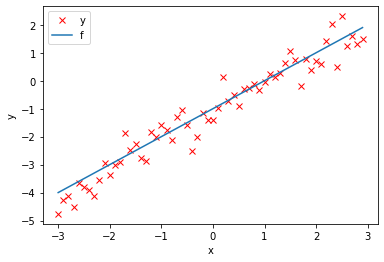

In [ ]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


<Figure size 432x288 with 0 Axes>

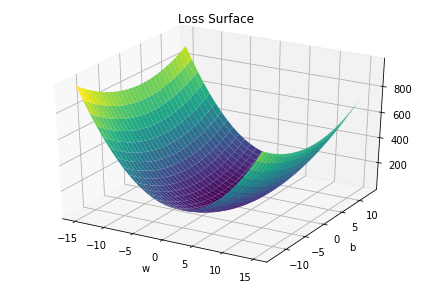

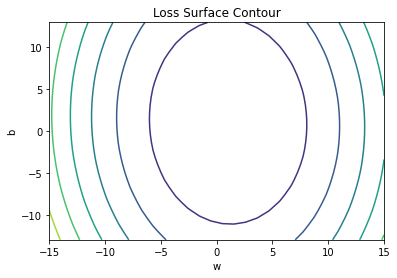

In [ ]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

<!--Empty Space for separating topics-->


<!--Empty Space for separating topics-->


<h2><div id="5">Train the Model: Batch Gradient Descent</div></h2>


Create model parameters <code>w</code>, <code>b</code> by setting the argument <code>requires_grad</code> to True because the system must learn it.


In [ ]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Set the learning rate to  0.1 and create an empty list <code>LOSS</code> for storing the loss for each iteration.


In [ ]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS_BGD = []

Define <code>train_model</code> function for train the model.


In [ ]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
            
        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss.tolist())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 10 epochs of batch gradient descent:

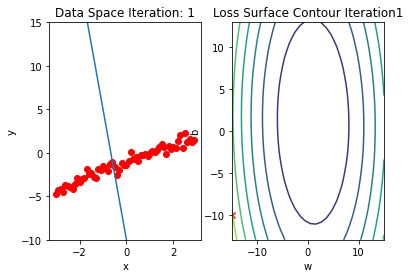

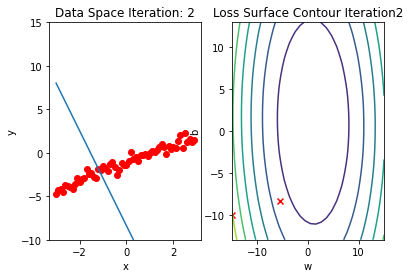

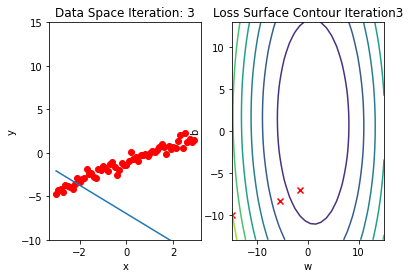

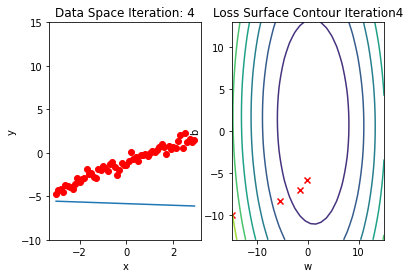

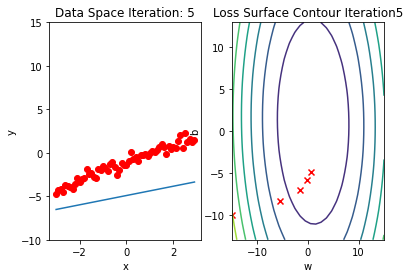

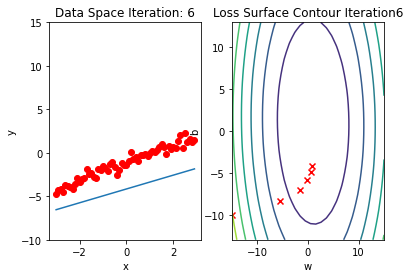

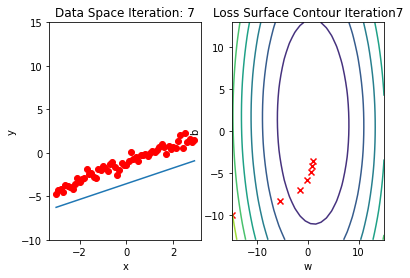

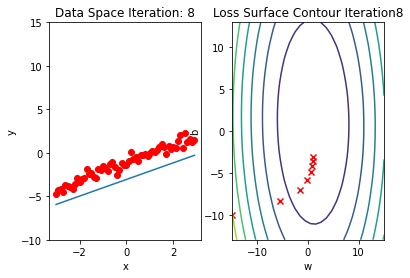

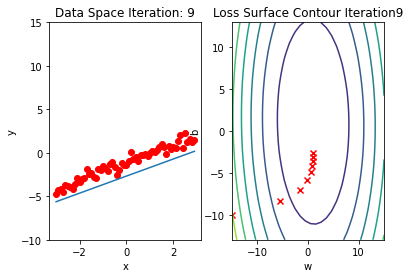

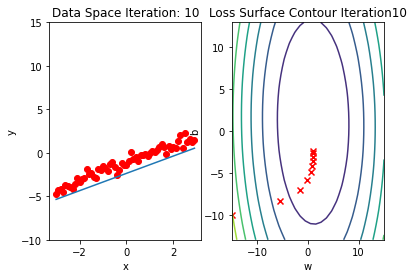

In [ ]:
train_model(10)

<!--Empty Space for separating topics-->


<h2><div id="6">Train the Model: Stochastic Gradient Descent</div></h2>


Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [ ]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Define <code>train_model_SGD</code> function for training the model.


In [ ]:
# The function for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


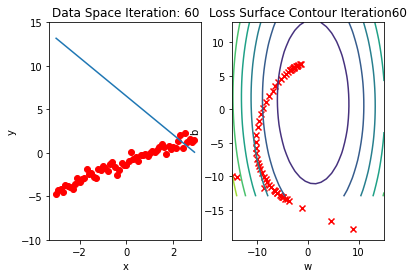

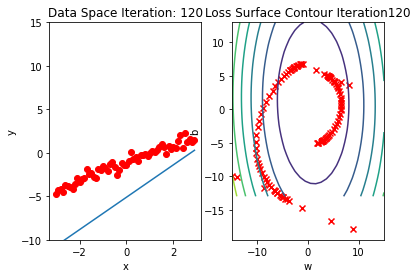

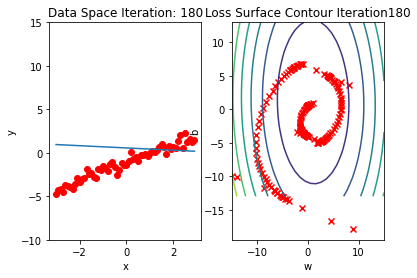

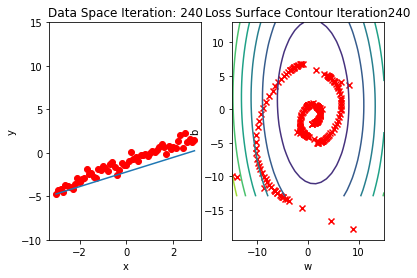

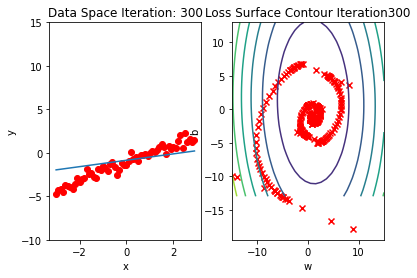

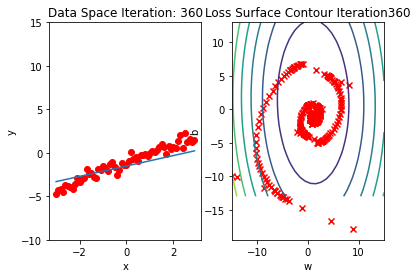

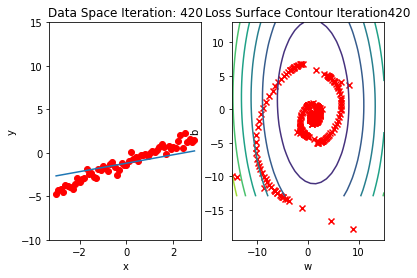

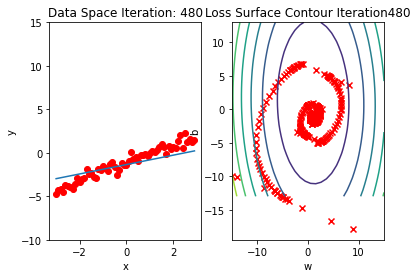

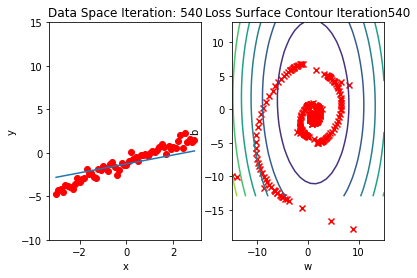

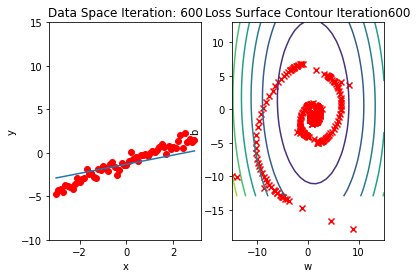

In [ ]:
# Train the model with 10 iterations

train_model_SGD(10)

<h3><div id='7'>Compare SGD and BGD loss</div></h3>
Compare the loss of both batch gradient descent as SGD.
<div><a href='https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/'><b>Click here</b></a> for more information.</div>

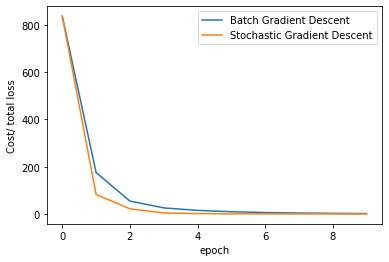

In [ ]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD, label = "Batch Gradient Descent")
plt.plot(LOSS_SGD, label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<hr />

### About the author

`Name`: Erfan Asadi
<br />
`Email`: erfanasadi.ce@gmail.com
<br />
`Linkedin`: https://www.linkedin.com/in/erfan-asadi-9b64b9163/
<br />
`GitHub`: https://github.com/ErfanAsadi
<br />
<hr />


<!--Empty Space for separating topics-->
